# Sign Language Recognition

## ToDo
- [x] Prepare Notebook
- [x] Exploratory Data Analysis
- [x] Data Preprocessing
- [x] Model Traning
- [ ] HyperTuning
- [ ] Evaluating

### Prepare Notebook

In [1]:
# Import Pacakge

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import and Load dataset

train_df = pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
train_df.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149


### Exploratory Data Analysis

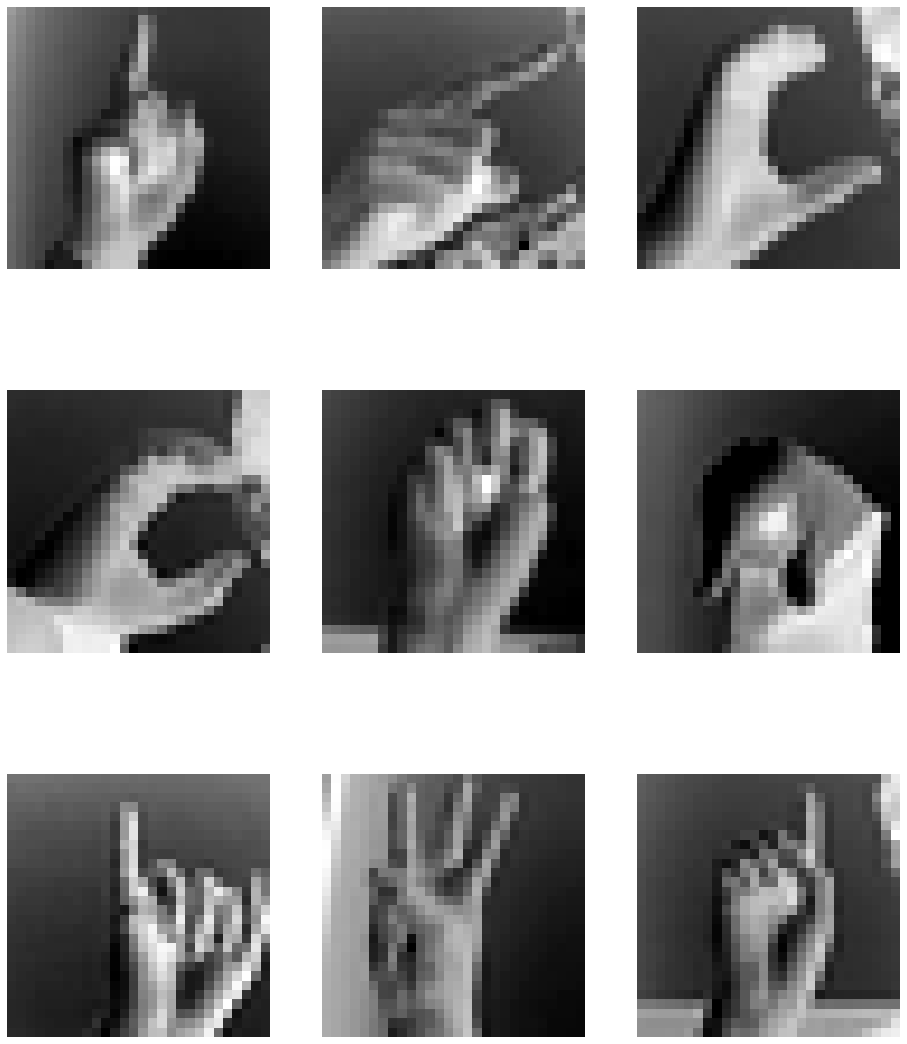

In [4]:
data = train_df.drop(['label'], axis = 1)
num = 0
row, col = 3, 3
fig, ax = plt.subplots(row, col, figsize = (16, 20))
for i in range(row):
    for j in range(col):
        img = data.iloc[num].to_numpy()
        img = img.reshape((28, 28))
        ax[i, j].imshow(img, cmap = 'binary')
        ax[i, j].axis('off')
        num += 1
plt.show()

### Data Preprocessing

In [5]:
# Splitting Labels and Inputs

X = train_df.drop(['label'], axis = 1)
y = train_df['label']

In [7]:
# Scaling Numerical features

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [8]:
# Splitting validation set and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21964, 784), (5491, 784), (21964,), (5491,))

### Model Traning

In [10]:
# Traning Non-scaled inputs

firstModel = SVC()
firstModel.fit(X_train, y_train)

SVC()

In [23]:
cross_val_score(firstModel, X_train, y_train, scoring = 'accuracy', cv = 5, verbose = 2, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV] END .................................................... total time= 2.2min
[CV] END .................................................... total time= 2.3min
[CV] END .................................................... total time= 2.3min
[CV] END .................................................... total time= 2.3min
[CV] END .................................................... total time= 1.0min


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.3min finished


array([0.9993171 , 1.        , 0.99908946, 1.        , 0.99977231])

In [25]:
cross_val_score(firstModel, X_test, y_test, scoring = 'accuracy', cv = 5, verbose = 2, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV] END .................................................... total time=  13.7s
[CV] END .................................................... total time=  13.8s
[CV] END .................................................... total time=  13.9s
[CV] END .................................................... total time=  14.2s
[CV] END .................................................... total time=   7.9s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.6s finished


array([0.9499545 , 0.9435337 , 0.95081967, 0.96539162, 0.95628415])

In [26]:
crossTrainScore = [0.9993171 , 1.        , 0.99908946, 1.        , 0.99977231]

crossValScore = [0.9499545 , 0.9435337 , 0.95081967, 0.96539162, 0.95628415]

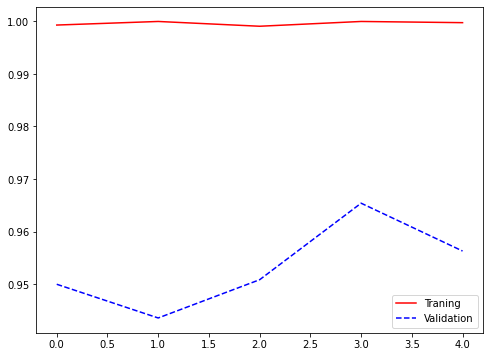

In [34]:
plt.figure(figsize = (8, 6))
plt.plot(crossTrainScore, 'r-')
plt.plot(crossValScore, 'b--')
plt.legend(['Traning', 'Validation'])
plt.show()

### HyperTuning

In [37]:
searchParams = {
    'gamma' : ['scale', 'auto'],
    'kernel' : ['linear', 'rbg', 'sigmoid'],
    'decision_function_shape' : ['ovo', 'ovr']
}

In [38]:
secondModel = SVC(random_state = 4)
cv = GridSearchCV(
    estimator = secondModel,
    param_grid = searchParams,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1
)

cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(random_state=4), n_jobs=-1,
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbg', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [40]:
cv.best_estimator_

SVC(decision_function_shape='ovo', kernel='linear', random_state=4)

In [46]:
pd.DataFrame(cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_function_shape,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,36.521193,0.402082,11.184639,0.223278,ovo,scale,linear,"{'decision_function_shape': 'ovo', 'gamma': 's...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1
1,0.414882,0.035944,0.000000,0.000000,ovo,scale,rbg,"{'decision_function_shape': 'ovo', 'gamma': 's...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,562.430215,11.758399,79.737802,1.584395,ovo,scale,sigmoid,"{'decision_function_shape': 'ovo', 'gamma': 's...",0.046893,0.046665,0.046665,0.046665,0.046676,0.046713,0.00009,5
3,36.845417,1.399937,10.805287,0.429946,ovo,auto,linear,"{'decision_function_shape': 'ovo', 'gamma': 'a...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1
4,0.272171,0.013174,0.000000,0.000000,ovo,auto,rbg,"{'decision_function_shape': 'ovo', 'gamma': 'a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
5,512.973969,12.206194,77.355228,2.183751,ovo,auto,sigmoid,"{'decision_function_shape': 'ovo', 'gamma': 'a...",0.046893,0.046665,0.046665,0.046665,0.046676,0.046713,0.00009,5
6,38.057308,0.549061,11.011253,0.663424,ovr,scale,linear,"{'decision_function_shape': 'ovr', 'gamma': 's...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1
7,0.387054,0.013354,0.000000,0.000000,ovr,scale,rbg,"{'decision_function_shape': 'ovr', 'gamma': 's...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
8,551.523335,22.478806,77.291127,1.266258,ovr,scale,sigmoid,"{'decision_function_shape': 'ovr', 'gamma': 's...",0.046893,0.046665,0.046665,0.046665,0.046676,0.046713,0.00009,5
9,36.372981,1.092505,10.942999,0.310503,ovr,auto,linear,"{'decision_function_shape': 'ovr', 'gamma': 'a...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1


In [50]:
cv.best_params_

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}

In [48]:
bestParams = cv.best_params_

In [49]:
finalModel = SVC(**bestParams, random_state = 4)
finalModel.fit(X_train, y_train)
accuracy_score(finalModel.predict(X_train), y_train), accuracy_score(finalModel.predict(X_test), y_test)

(1.0, 1.0)